In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats

In [23]:
df = pd.read_csv('data/genetherapy.csv')

In [24]:
a = df[df['Therapy']=='A']
a = a.loc[:,'expr']
a

In [31]:
b = df[df['Therapy']=='B']
b = b.loc[:,'expr']
c = df[df['Therapy']=='C']
c = c.loc[:,'expr']
d = df[df['Therapy']=='D']
d = d.loc[:,'expr']

45    92
46    85
47    95
48    89
49    91
50    91
51    99
52    94
53    97
54    94
55    87
56    93
57    96
58    92
59    90
Name: expr, dtype: int64

In [32]:
#perform one-way ANOVA
scipy.stats.f_oneway(a, b, c, d)

F_onewayResult(statistic=8.03730248114399, pvalue=0.0001524972289522953)

In [33]:
df = pd.read_csv('data/atherosclerosis.csv')
df

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1
...,...,...,...
59,101.851582,2,D2
60,105.239530,2,D2
61,99.350198,2,D2
62,108.091455,2,D2


In [48]:
#perform two-way ANOVA
model = ols('expr ~ C(age) + C(dose)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(age),197.452754,1.0,7.569592,0.007804
C(dose),16.912241,1.0,0.648351,0.423830
Residual,1591.184501,61.0,NaN,NaN


In [49]:
df = pd.read_csv('data/birds.csv')
df

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1
...,...,...,...
59,17.054195,0,0
60,22.951551,0,0
61,18.799382,0,0
62,16.543161,0,0


In [51]:
#perform two-way ANOVA
model = ols('var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(hormone),0.847472,1.0,0.086528,0.769653
C(sex),0.119762,1.0,0.012228,0.912318
C(hormone):C(sex),89.483384,1.0,9.136390,0.003682
Residual,587.650394,60.0,NaN,NaN


In [54]:
x = np.array([4, 5, 2, 3, 1])
y = np.array([2, 1, 4, 3, 5])

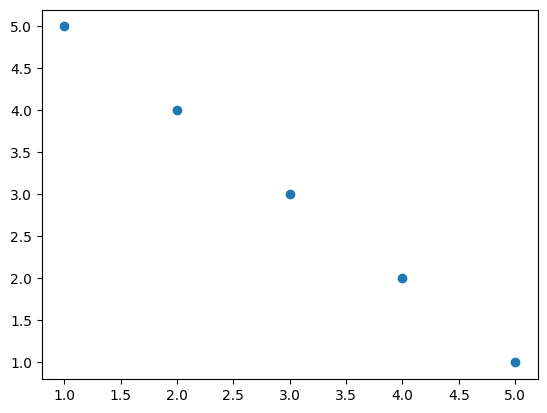

In [55]:

plt.scatter(x, y)
plt.show()

In [57]:
scipy.stats.pearsonr(x, y)[0]

-1.0

regression analysis

In [63]:
df = pd.read_csv('data/states.csv')

In [65]:
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


зависимая переменная - poverty, предиктор - hs_grad

In [66]:
dff = df.loc[:, ['hs_grad', 'poverty']]
dff.head()

,hs_grad,poverty
0,79.9,14.6
1,90.6,8.3
2,83.8,13.3
3,80.9,18.0
4,81.1,12.8


Можем наблюдать линейную зависимость между переменными, значит можно делать регрессионный анализ, проверку остатков на нормальность и гомоскедастичность сделаем позже.
Нулевая гипотеза: b1 = 0, то есть переменная предиктор никак не объясняет зависимую переменную.

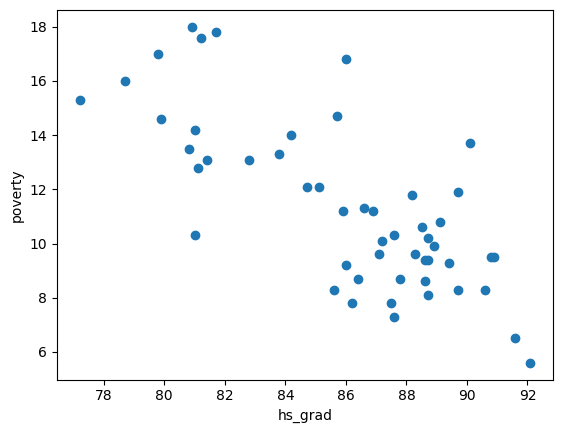

In [74]:
x1 = dff.hs_grad
y = dff.poverty
plt.scatter(x1, y)
plt.xlabel('hs_grad')
plt.ylabel('poverty')
plt.show()

корреляция между переменными = -0,75, переменные точно как-то связаны друг с другом

In [75]:
scipy.stats.pearsonr(x1, y)

PearsonRResult(statistic=-0.7468582531582508, pvalue=3.108829810318336e-10)

Применяем линейную регрессию по методу наименьших квадратов (OLS), x1 - hs_grad, y - poverty
В саммари есть несколько важных штук: coef - коэффициенты уравнения регрессии, при изменении уровня образования на 1%, уровень бедности уменьшается на 0.62%.
std err - показывает точность предсказания каждой переменной (чем меньше, тем лучше).
 P>|t| - p-value - вероятность отвергнуть нулевую гипотезу, когда она права, т.е. если p-value < 0.05, можно смело отвергнуть нулевую гипотезу и принять альтернативную, в нашем случае - то, что предиктор объясняет зависимую переменную.
 R-squared - практически 56% изменчивости зависимой переменной объясняется моделью. 
F-statistic - статистика Фишера используется для проверки гипотезы о связи между объясняемым рядом и регрессорами. Используется нулевая гипотеза: коэффициенты при всех регрессорах равны нулю. Если p-value < 0.05, модель имеет смысл. Чем меньше F-statistic, тем меньше смысл в модели.

In [76]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           3.11e-10
Time:                        12:05:07   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7810      6.803      9.523      0.000      51.111      78.451
hs_grad       -0.6212      0.079     -7.862      0.000      -0.780      -0.462
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.653
Skew:                           0.540   Prob(JB):                        0.265
Kurtosis:                       3.289   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Получаем уравнение регрессии: y' = b0*x + b1*x1, x всегда =1, b0 = const=64.781, b1 = coef(hs_grad)=-0.6212, получаем уравнение линии регрессии: 
yhat = -0.6212*x1 + 64.781. Это линия регрессии, т.е. оранжевая линия на графике, т.е. предсказанные значения y'

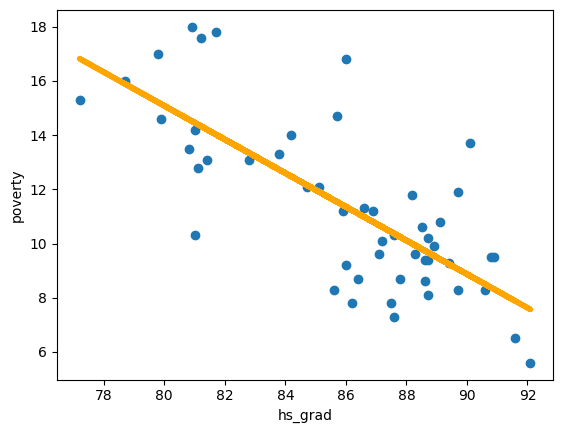

In [77]:
plt.scatter(x1, y)
yhat = -0.6212*x1 + 64.781
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('hs_grad')
plt.ylabel('poverty')
plt.show()

Теперь посмотрим на поведение остатков. На графике qqplot видно что в целом остатки распределены нормально, и присутствует гомоскедастичность, т.е. остатки ведут себя одинаково на всем графике


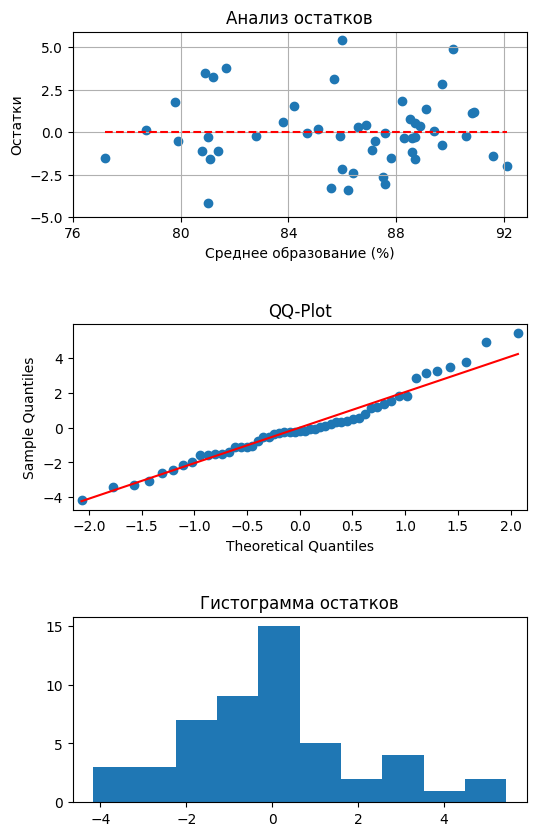

In [94]:
xx = np.linspace(min(x1), max(x1), len(x1))
residuals = y-yhat
#2 graphs
fig, (ax1,ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(6, 9))
#scatter plot
ax1.scatter(x1,residuals)
ax1.plot(xx,[0]*len(xx),'--r')
#qq plot
sm.qqplot(residuals, line='s', ax=ax2)
#histogram
ax3.hist(residuals)

ax1.grid()
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

ax3.set_title('Гистограмма остатков')

fig.tight_layout(pad=3.0)
plt.show()

In [99]:
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


В случае множественной линейной регрессии, нужно смотреть на исправленный коэфф. детерминации adjusted R squared, вместо R squared. Чем больше, тем лучше модель объясняет данные

In [101]:
lm = ols(formula='poverty ~ metro_res + hs_grad + white + female_house', data=df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           8.88e-10
Time:                        15:35:13   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

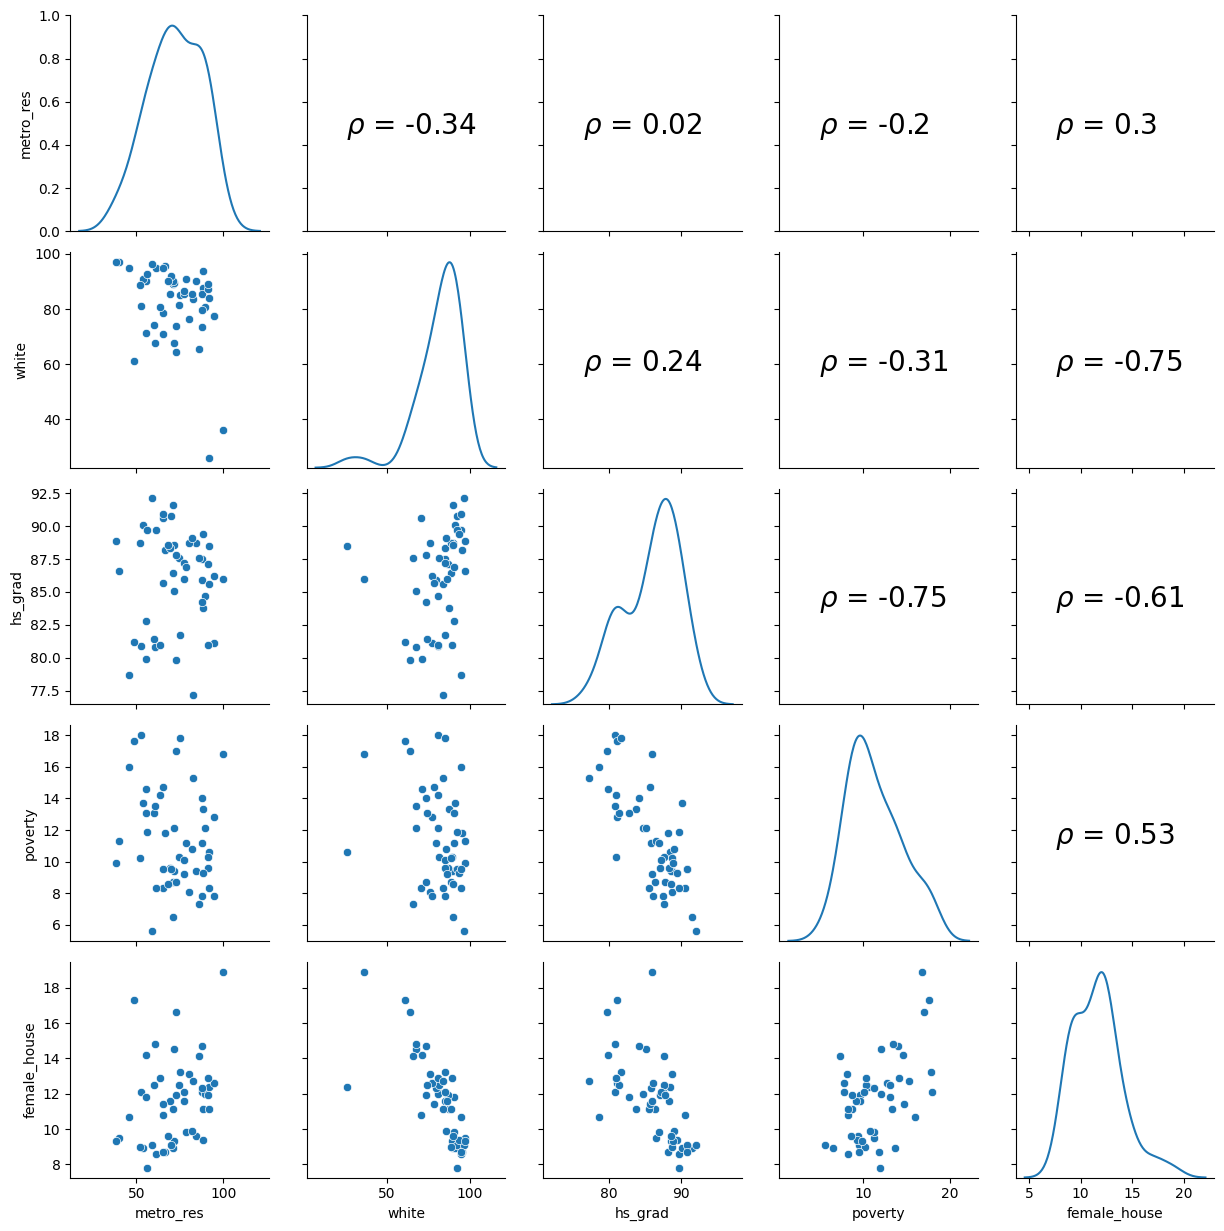

In [118]:
import seaborn as sns

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.45), size = 20, xycoords = ax.transAxes)

g = sns.PairGrid(df, diag_sharey=False)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

Чтобы подобрать лучшую модель, нужно перебирать разные и смотреть где будет наибольший R squarde adj. При этом важно помнить, что сильная корреляция между независимыми переменными (мультиколлинеарность) может сильно ухудшить модель, поэтому желательно исключать из модели предиктор, сильно коррелирующий с остальными независимыми переменными.

In [103]:
# Найдём такой набор фичей, что R-squared максимальна
feats = {'metro_res', 'white', 'hs_grad', 'female_house'}

# Рекурсивно переберём все сочетания переменных
def brute_force(params: set, formula: str, result: set) -> str:
    if not params:
        result.add(formula.lstrip('+ '))
        return 
    else:
        new_params = params.copy()
        for el in params:
            new_params.remove(el)

            brute_force(new_params, formula + ' + ' + el, result)
            brute_force(new_params, formula, result)

res = set()          
brute_force(feats, '', res)
res.remove('')

# Теперь посчитаем Adjusted R-Square для каждого сочетания и выведем на экран
for formula in res:
    lm = ols(formula='poverty ~ ' + formula, data=df).fit()
    print(f'{lm.rsquared_adj:.2}', formula)

0.022 metro_res
0.55 hs_grad
0.55 white + hs_grad + female_house
0.56 white + hs_grad
0.26 female_house
0.58 metro_res + hs_grad
0.077 white
0.4 metro_res + female_house
0.17 white + metro_res
0.62 white + metro_res + hs_grad
0.6 metro_res + hs_grad + female_house
0.61 white + metro_res + hs_grad + female_house
0.55 hs_grad + female_house
0.26 white + female_house
0.39 white + metro_res + female_house


Самая сильная модель содержит предикторы: white, metro_res, hs_grad и дает R squared adj. = 0.62

In [106]:
lm_final = ols(formula='poverty ~ metro_res + hs_grad + white', data=df).fit()
lm_final.summary()
params = lm_final.params
params

Intercept    68.722015
metro_res    -0.055532
hs_grad      -0.569724
white        -0.053327
dtype: float64

Text(0.5, 1.0, 'QQ-plot')

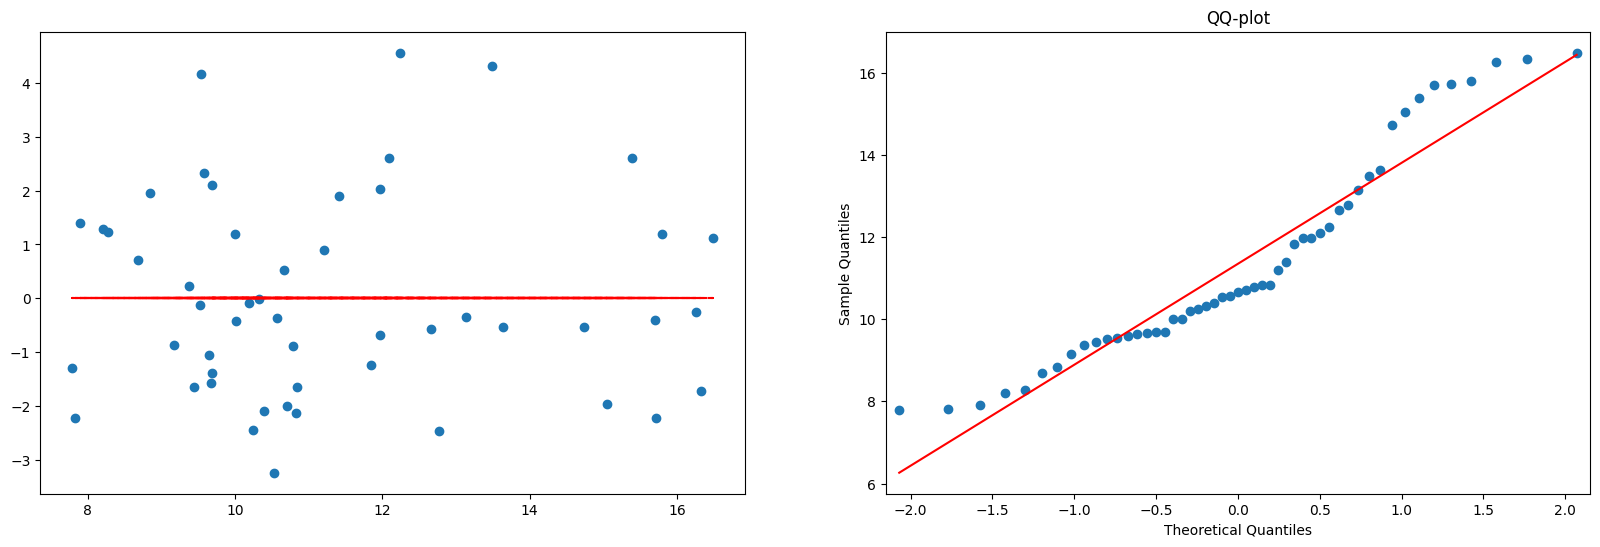

In [117]:
# Предсказанные значения (значения из DataFrame -> уравнение регресионной модели) 
y = params[0] + params[1] * df['metro_res'] + params[3] * df['white'] + params[2] * df['hs_grad'] 
# Вычисление остатка с помощью библиотеки statsmodels.formula.api - sm
# Остатки - на сколько y далека от теоретической модели
residuals = ols(formula="poverty ~ metro_res + white + hs_grad", data=df).fit().resid
# residuals = data['poverty'] - y - то же самое
# Создаем графики
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
# Scatter plot
ax1.scatter(y,residuals)
ax1.plot(y,[0]*len(y),'--r')

plt.title('Анализ остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
# QQ-plot
sm.qqplot(y, line='s', ax=ax2)
plt.title('QQ-plot')

In [119]:
params[0] + params[1] * 80 + params[3] * 50 + params[2] * 90 

10.337911168219257